In [6]:
import numpy as np
import pandas as pd
import scipy.stats as st
import seaborn as sns
import matplotlib.pyplot as plt

Нулевая гипотеза (H0): Разницы между средним временем доставки в тестовой и контрольной группе нет
Альтернативная гипотеза (H1): Разница между средним временем доставки в тестовой и контрольной группе есть

In [2]:
df = pd.read_csv('experiment_lesson_4.csv')

In [3]:
df

,order_id,delivery_time,district,experiment_group
0,3159,44.0,Purlieus,control
1,10426,51.0,Purlieus,control
2,9155,46.0,Purlieus,control
3,10699,34.0,Purlieus,control
4,10061,43.0,Purlieus,control
...,...,...,...,...
20191,14561,42.0,Suburb,test
20192,12015,32.0,Suburb,test
20193,20077,23.0,Purlieus,test
20194,14861,41.0,Central,test


In [5]:
df.isna().any()

order_id            False
delivery_time       False
district            False
experiment_group    False
dtype: bool

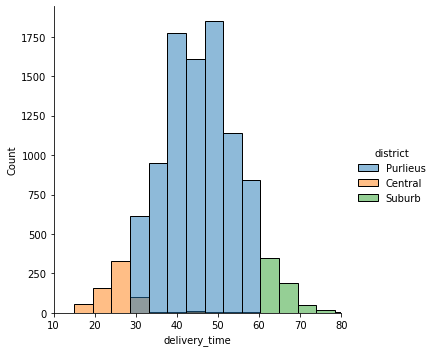

In [21]:
sns.displot(x='delivery_time', data=df.query("experiment_group == 'control'"), hue='district', bins=15)
plt.xlim(10, 80);

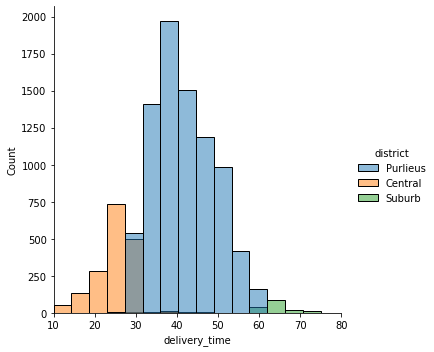

In [22]:
sns.displot(x='delivery_time', data=df.query("experiment_group == 'test'"), hue='district', bins=15)
plt.xlim(10, 80);

In [24]:
#посчитайем количество наблюдений в тестовой и контрольной группе

df.groupby('experiment_group', as_index=False).agg({'order_id': 'count'})

,experiment_group,order_id
0,control,10092
1,test,10104


In [26]:
#проверим выборки на нормальность

df_control = df.query("experiment_group == 'control'").delivery_time
df_test = df.query("experiment_group == 'test'").delivery_time

print(f'Проверка контрольной группы на нормальность:', st.normaltest(df_control))
print(f'Проверка тестовой группы на нормальность:', st.normaltest(df_test))

Проверка контрольной группы на нормальность: NormaltestResult(statistic=0.25349755437872584, pvalue=0.8809549607809654)
Проверка тестовой группы на нормальность: NormaltestResult(statistic=7.024157092641915, pvalue=0.02983483685333173)


То есть в контрольной группе знаечния распределены нормально, а в тестовой - ненормально.

In [30]:
#найдем стандартное отклонение для выборок

print(f'Стандартное отклонение для контрольной группы:', round(np.std(df_control), 2))
print(f'Стандартное отклонение для тестовой группы:', round(np.std(df_test), 2))

Стандартное отклонение для контрольной группы: 9.99
Стандартное отклонение для тестовой группы: 9.88


In [32]:
#сравним средние этих выборок при помощи t-теста

st.ttest_ind(df_test, df_control)

Ttest_indResult(statistic=-43.03582663183714, pvalue=0.0)

То есть мы можем отклонить H0!

In [46]:
#Найдем, на сколько процентов изменилось среднее время доставки в тестовой группе по сравнению с контрольной

a = round(((df_test.mean() - df_control.mean())/df_control.mean()*100), 2)
print(f'Среднее время доставки в тестовой группе по сравнению с контрольной изменилолсь на', a,'%')

Среднее время доставки в тестовой группе по сравнению с контрольной изменилолсь на -13.35 %


Вывод: Да, раскатываем новый алгоритм на всех, так как среднее время доставки статистически значимо изменилось.
       Среднее время доставки в тесте меньше, чем в контроле.